In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = "1-wiau52GS_PSb08RC8lyHujzi_8MI03p"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('images.zip')  
!unzip images.zip



id = "1SSyz0F1nFh6I2RspzDHkhXZDak0YcAt5"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_labels.csv')  
train=pd.read_csv('train_labels.csv')

In [ ]:
!unzip images.zip

In [ ]:
from PIL import Image
import glob
import os
import pandas as pd

In [ ]:
train.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [ ]:
!cp '/content/gdrive/My Drive/#ZindiWeekendz - Spot the Mask Challenge/sample_sub_v2.csv' sample.csv

In [ ]:
sample=pd.read_csv('sample.csv')
sample.shape

(509, 2)

In [ ]:
train.shape

(1308, 2)

In [ ]:
for i in sample.values.tolist():
    img = Image.open('/content/images/'+'/'+i[0])
    img.save("/content/test/"+i[0])

In [ ]:
for i in train.values.tolist():
  try:
    img = Image.open('/content/images/'+'/'+i[0])
    if(i[1]==0):
      img.save("/content/train/not_masked/"+i[0])
    else:
      img.save("/content/train/masked/"+i[0]) 
  except:
    print("working")

working


In [ ]:
!zip -r masked.zip masked
!zip -r not_masked.zip not_masked
!zip -r test.zip test

In [ ]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
%reload_ext autoreload
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *
from torch import  *
from fastai.callbacks import *
import warnings
import torch
import torchvision.models as torch_models
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/train"


Mounted at /content/gdrive


In [ ]:
path = Path(root_dir)
path

PosixPath('/content/train')

In [ ]:
classes=['masked','not_masked']
for c in classes :
    print(c)
    verify_images (path/'train'/c, max_workers=8)

masked
not_masked


In [ ]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train="train",
                                ds_tfms=get_transforms(do_flip=True,flip_vert=True),valid_pct=0.33,size=350,num_workers=0,bs=32).normalize(imagenet_stats)

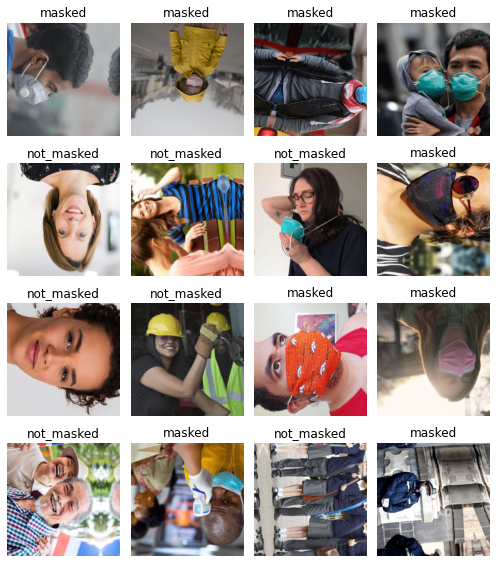

In [ ]:
data.show_batch(rows=4, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['masked', 'not_masked'], 2, 876, 431)

In [ ]:
learn= cnn_learner(data,torch_models.wide_resnet50_2, metrics=[accuracy,Recall(),error_rate])

Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/checkpoints/wide_resnet50_2-95faca4d.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


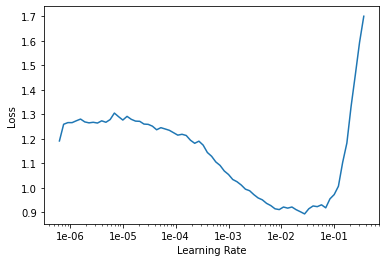

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8, max_lr=slice(1e-3,1e-2),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,recall,error_rate,time
0,0.875538,0.398014,0.897912,0.845794,0.102088,01:15
1,0.641200,0.227769,0.921114,0.943925,0.078886,01:12
2,0.503852,0.327157,0.918793,0.915888,0.081206,01:12
3,0.426063,0.226346,0.937355,0.906542,0.062645,01:12
4,0.317403,0.157360,0.944316,0.957944,0.055684,01:12
5,0.249022,0.135872,0.955916,0.957944,0.044084,01:12
6,0.201908,0.119083,0.960557,0.957944,0.039443,01:13
7,0.180675,0.111440,0.965197,0.967290,0.034803,01:13


Better model found at epoch 0 with accuracy value: 0.8979118466377258.
Better model found at epoch 1 with accuracy value: 0.9211136698722839.
Better model found at epoch 3 with accuracy value: 0.9373549818992615.
Better model found at epoch 4 with accuracy value: 0.9443155527114868.
Better model found at epoch 5 with accuracy value: 0.9559164643287659.
Better model found at epoch 6 with accuracy value: 0.9605568647384644.
Better model found at epoch 7 with accuracy value: 0.9651972055435181.


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learn)
interpreter.most_confused(min_val=2)

[('not_masked', 'masked', 11)]

In [ ]:
learn.save('stage-1')


In [ ]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


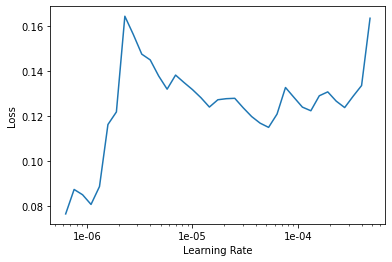

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8, max_lr=slice(1e-6),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,recall,error_rate,time
0,0.142973,0.113513,0.962877,0.957944,0.037123,01:25
1,0.139334,0.115730,0.962877,0.957944,0.037123,01:26
2,0.122108,0.110321,0.962877,0.957944,0.037123,01:25
3,0.126077,0.109804,0.965197,0.957944,0.034803,01:25
4,0.105650,0.110810,0.965197,0.957944,0.034803,01:25
5,0.110713,0.110749,0.962877,0.957944,0.037123,01:24
6,0.109947,0.116625,0.958237,0.957944,0.041763,01:26
7,0.104273,0.113662,0.962877,0.962617,0.037123,01:27


Better model found at epoch 0 with accuracy value: 0.9628770351409912.
Better model found at epoch 3 with accuracy value: 0.9651972055435181.


In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


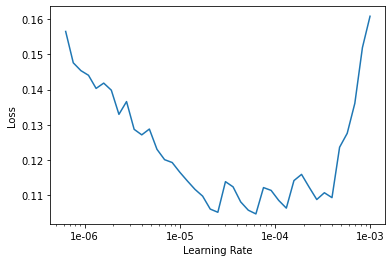

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-5),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,recall,error_rate,time
0,0.154422,0.113380,0.962877,0.957944,0.037123,01:26
1,0.140839,0.111144,0.962877,0.957944,0.037123,01:25
2,0.110143,0.112214,0.965197,0.957944,0.034803,01:26
3,0.111637,0.112283,0.962877,0.962617,0.037123,01:26
4,0.112478,0.112831,0.965197,0.962617,0.034803,01:25
5,0.099903,0.113565,0.965197,0.971963,0.034803,01:25
6,0.107719,0.113829,0.965197,0.971963,0.034803,01:25
7,0.095690,0.115297,0.960557,0.962617,0.039443,01:25
8,0.097691,0.114987,0.962877,0.962617,0.037123,01:25
9,0.112784,0.105444,0.965197,0.962617,0.034803,01:25


Better model found at epoch 0 with accuracy value: 0.9628770351409912.
Better model found at epoch 2 with accuracy value: 0.9651972055435181.


In [ ]:
sub=pd.DataFrame(data={'id':[],'label':[]})

In [ ]:
pred=[]
directory="/content/test"
for img in os.listdir(directory):
  cat, tensor, probs = learn.predict(open_image(f"/content/test/"+img))
  pred.append(probs.tolist()[0])

In [ ]:
imgname=[]
for img in os.listdir(directory):
  imgname.append(img)

In [ ]:
sub['id']=imgname

In [ ]:
sub['label']=pred

In [ ]:
sub

,id,label
0,jxtfudtgjrjafphvpcpyzvbjzkedlt.jpg,1.000000
1,dlaaovaxfeqezvculovoovlyakhlgd.jpg,0.000064
2,fhggkjdcfrlbgjgdohqetzvtzvzwox.jpg,0.003825
3,mragkclknhcnqosdkuvchpjdrjofso.jpg,0.999710
4,zpfhbgixcctxylnihhrepjgcmjksvf.jpg,0.000005
...,...,...
504,unwndegdcmlinkjsprkshhnpomqvwd.jpg,0.000021
505,ltuibmgnhtgsfugypuufvwrqprxtfk.jpg,0.999976
506,ejmhvjdcgulaxvqqwyuwabbwqjievn.jpg,0.999977
507,usdqhnysmqfjitrxqnfxkureaphlsa.jpg,0.941577


In [ ]:
sub.to_csv('out1.csv',index=False)